# Algorithme de Deustch_Joza

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, transpile

Fonction qui construit le circuit quantique d'un oracle

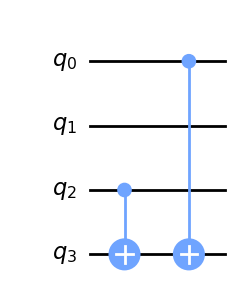

In [85]:
# Constante est vrai si la fonction est constante et fause si la fonction est balancé
# Si num_fonction n'est pas entré, le numéro sera choisis au hasard
def oracle_Deustch_Joza(nb_qbits, constante, num_fonction):
    qreg = QuantumRegister(nb_qbits+1, "q")
    circuit = QuantumCircuit(qreg)
    if constante == True:
        if num_fonction == 1:
            circuit.x(nb_qbits)
        elif num_fonction != 0:
            print("Il y a uniquement 2 fonction constantes (0 et 1). On suppose que vous avez entré 0")

    elif constante == False:
        factorial_nb_qbit = 1
        for i in range(1, nb_qbits+1):
            factorial_nb_qbit *= i

        #Numéro de la fonction en binaire (les numéros commence à 1, car on veut avoir au moins un 1 dans la chaine de charactère pour avoir une porte cnot)
        if num_fonction < factorial_nb_qbit+1:
            bit_string = f"{num_fonction+1:0{nb_qbits}b}"

        #Si le numéro est assez grand, on applique une porte x au dernier qbit et on convertie en binaire pour savoir à quel endroit on veut appliquer les portes cnot
        elif num_fonction < (factorial_nb_qbit+1) * 2:
            circuit.x(nb_qbits)
            bit_string = f"{num_fonction-factorial_nb_qbit:0{nb_qbits}b}"


        #Si le numéro est trop grand
        else:
            print("Le numéro de la fonction est trop élevé")

        # On ajoute les portes cnot
        for i in range(nb_qbits):
            if bit_string[i] == "1":
                circuit.cnot(nb_qbits - 1 - i, nb_qbits)

    return circuit


oracle_Deustch_Joza(3, False, 4).draw("mpl")

In [49]:
factorial = 1
for i in range(1, 6+1):
    factorial *= i
print(factorial)

720
